In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.stats import gaussian_kde
import numpy as np
import mpl_scatter_density
import seaborn as sns

## Data Exploration

In [3]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: median_house_value, Length: 3842, dtype: int64

In [13]:
df['median_income'].value_counts()

3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: median_income, Length: 12928, dtype: int64

In [12]:
df[df['median_house_value']==187500.0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
48,-122.26,37.82,40.0,624.0,195.0,423.0,160.0,0.9506,187500.0,NEAR BAY
93,-122.27,37.79,27.0,1055.0,347.0,718.0,302.0,2.6354,187500.0,NEAR BAY
435,-122.30,37.88,45.0,453.0,146.0,749.0,137.0,1.4750,187500.0,NEAR BAY
614,-122.15,37.74,49.0,1494.0,316.0,611.0,288.0,2.2000,187500.0,NEAR BAY
728,-122.11,37.67,36.0,2110.0,389.0,952.0,370.0,3.8000,187500.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
19607,-121.02,37.48,26.0,467.0,NaN,244.0,83.0,4.1346,187500.0,INLAND
20204,-119.20,34.25,25.0,195.0,59.0,140.0,43.0,3.8889,187500.0,NEAR OCEAN
20229,-119.30,34.27,17.0,1527.0,503.0,688.0,423.0,1.6007,187500.0,NEAR OCEAN
20415,-118.84,34.17,16.0,3449.0,820.0,1877.0,816.0,3.2176,187500.0,<1H OCEAN


In [7]:
df['housing_median_age'].nunique()

52

The dataset contains data about blocks of houses in California <br>

- longitude : A measure of how far west a house is; a higher value is farther west
- latitude : A measure of how far north a house is; a higher value is farther north
- housing_median_age: Median age of a house within a block; a lower number is a newer building
- total_rooms : total number of rooms within a block
- total_bedrooms : total number of bedrooms within a block
- population : Total number of people residing within a block
- households: Total number of households, a group of people residing within a home unit, for a block
- median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- median_house_value: Median house value for households within a block (measured in US Dollars)
- ocean_proximity: Location of the house w.r.t ocean/sea

In [4]:
df['ocean_proximity'].value_counts()/df.shape[0]

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# For the purpose of exploring data I will replace the None values with the mean value of the column
# df['total_bedrooms'].fillna(value=df['total_bedrooms'].mean(), inplace=True)

In [7]:
street_map = gpd.read_file('./data/cnty24k09_1_line.shp')
street_map = street_map.to_crs('epsg:4326')

#### Distribution of the data on the map of California

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

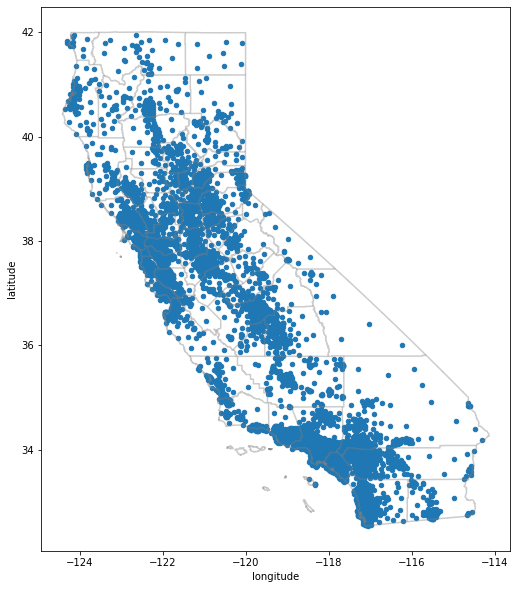

In [8]:
fig,ax = plt.subplots(figsize=(10,10))
street_map.plot(ax=ax, alpha = 0.4, color='grey')
df.plot(ax=ax, kind='scatter', x='longitude', y='latitude')

#### Density of the locations of the data

/Users/noakawa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

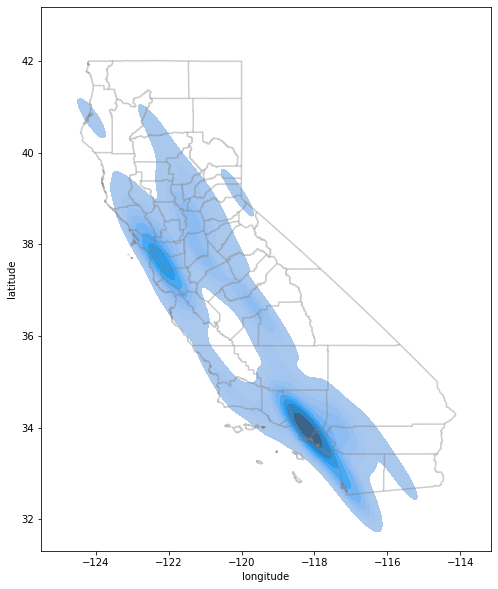

In [9]:
fig,ax = plt.subplots(figsize=(10,10))
street_map.plot(ax=ax, alpha = 0.4, color='grey')
sns.kdeplot('longitude','latitude', shade=True, thresh=0.05, data=df)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

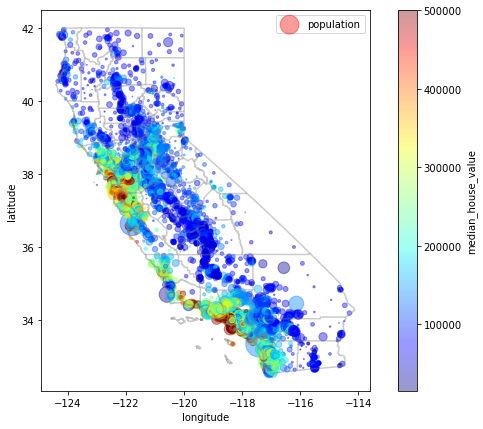

In [10]:
fig,ax = plt.subplots(figsize=(10,10))
street_map.plot(ax=ax, alpha = 0.4, color='grey')
df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.4,
                  s=df['population']/50, label='population', figsize=(10,7),
                  c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

The graph here shows the population for each datapoint (bigger the point is, bigger population)<br>
The colors are for the median house value

In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
num_col = df.describe().columns

In [13]:
df.corrwith(df["median_house_value"]).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
dtype: float64

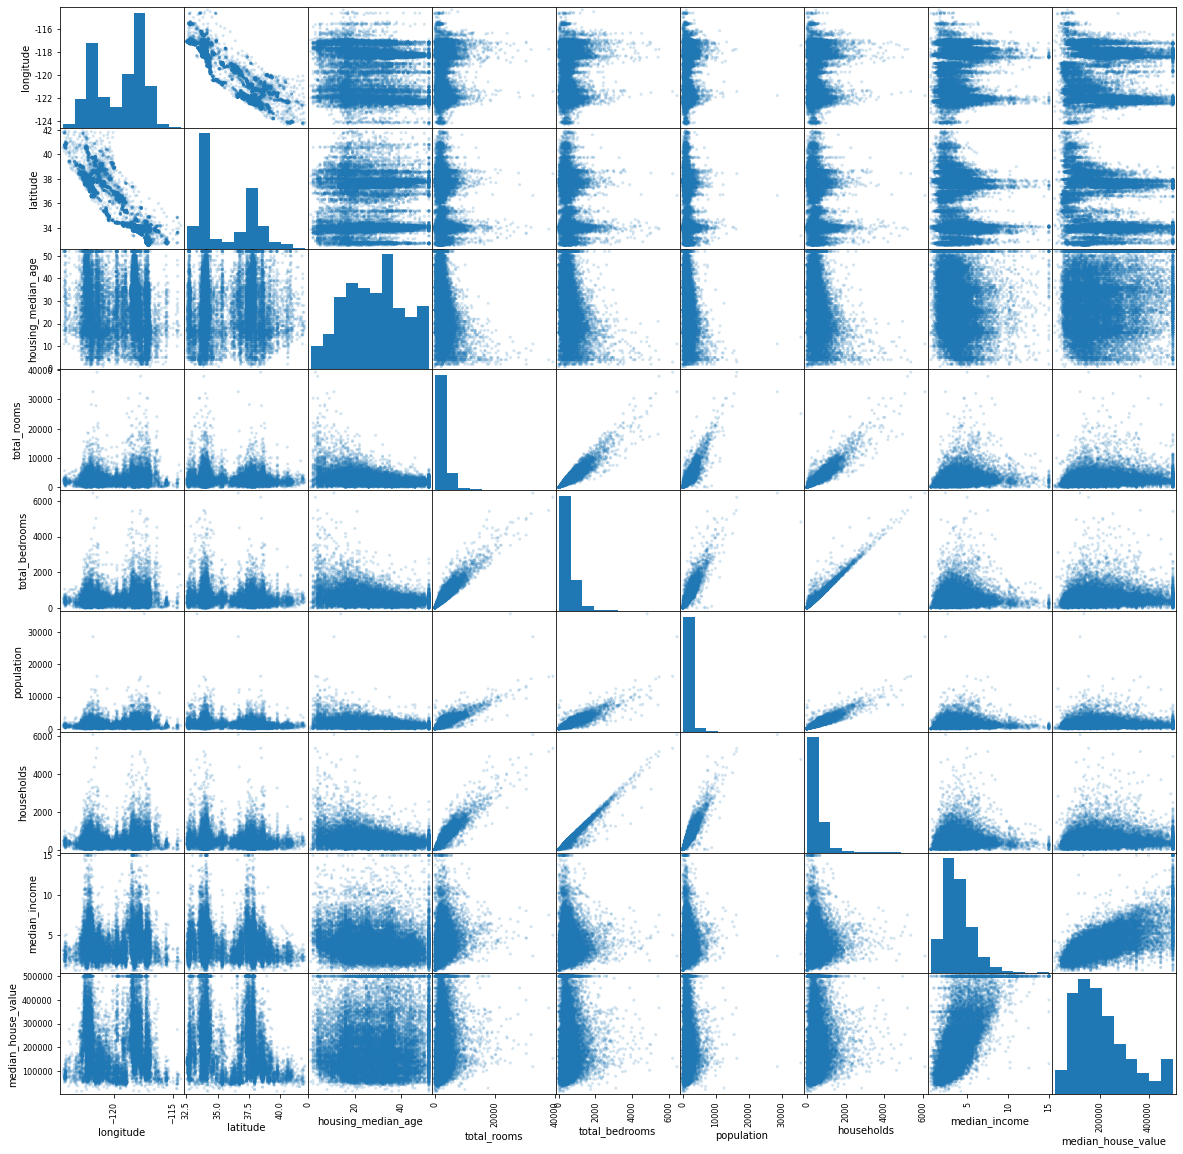

In [14]:
pd.plotting.scatter_matrix(df, alpha=0.2,figsize=(20,20))
plt.show()

There is one weird pattern with the label. Looking at the last row which is the median_house value relation with all other features, that we have a lot of data points that have the same median value, which is the maximum one.<br>
Besides that, the only feature where we can see some positive correlation is the median income, the correlation value is also 0.688075, which is the highest


<AxesSubplot:>

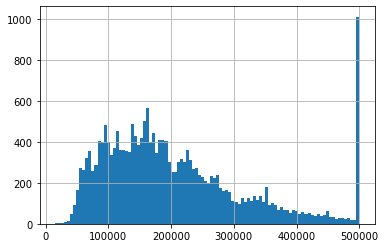

In [15]:
df['median_house_value'].hist(bins=100)

In [16]:
df['median_house_value'].max()

500001.0

In [17]:
df[df['median_house_value']==df['median_house_value'].max()].shape[0]

965

This confirms we have a lot of samples with the same value 

In [18]:
df[df['median_house_value']==df['median_house_value'].max()].shape[0]/df.shape[0]

0.04675387596899225

To avoid data leakage and use another column to fill those values as NA, we can drop all those rows, here 5% of the data. The other thing to do is understand where this mistakes come from and why so for next coming values we can avoid it. 

The curse of dimensionality means that when you increase the dimension (more variables) you need to exponentially increase the number of samples.

## Preprocessing

### Feature engineering

I will create a new feature that can explain how "crowded" are the houses. That is the population/households

In [19]:
print(f'Correlation with target of population by number of houses = '
      f'{(df["population"]/df["households"]).corr(df["median_house_value"])}\n')

print(f'Correlation with target of number of houses by population = '
      f'{(df["households"]/df["population"]).corr(df["median_house_value"])}\n')

print(f'Correlation with target of number of rooms by population = '
      f'{(df["total_rooms"]/df["population"]).corr(df["median_house_value"])}\n')

print(f'Correlation with target of number of bedrooms by population = '
      f'{(df["total_bedrooms"]/df["population"]).corr(df["median_house_value"])}\n')

print(f'Correlation with target of number of rooms by number of houses = '
      f'{(df["total_rooms"]/df["households"]).corr(df["median_house_value"])}\n')

print(f'Correlation with target of number of bedrooms by number of houses = '
      f'{(df["total_bedrooms"]/df["households"]).corr(df["median_house_value"])}\n')

Correlation with target of population by number of houses = -0.023737412956134345

Correlation with target of number of houses by population = 0.264909965352003

Correlation with target of number of rooms by population = 0.20948196900668928

Correlation with target of number of bedrooms by population = 0.06989602070580712

Correlation with target of number of rooms by number of houses = 0.15194828974145771

Correlation with target of number of bedrooms by number of houses = -0.04673948984474207



I will create features where the combination beats both the features I used to create the new one

In [20]:
df2 = df.copy()
df2['house_by_pop'] = df["households"]/df["population"]
df2['rooms_by_pop'] = df["total_rooms"]/df["population"]
df2['rooms_by_houses'] = df["total_rooms"]/df["households"]
# Combining longitude and latitude
df2['ll'] = df['longitude'] + df['latitude']

In [21]:
df2.corrwith(df2["median_house_value"]).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
house_by_pop          0.264910
rooms_by_pop          0.209482
rooms_by_houses       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
ll                   -0.491520
dtype: float64

In [22]:
df2["total_rooms"].corr(df2["total_bedrooms"])

0.9303795046865078

I can drop the total_bedrooms feature since it's very correlated to the number of rooms and don't gove me so much info about the median house values

Let's have a loo

In [23]:
df2.drop(columns=['households','population','longitude','latitude', 'total_bedrooms'], inplace=True)

In [24]:
df2.corrwith(df2["median_house_value"]).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
house_by_pop          0.264910
rooms_by_pop          0.209482
rooms_by_houses       0.151948
total_rooms           0.134153
housing_median_age    0.105623
ll                   -0.491520
dtype: float64

let's have a look at the correlation between features

/var/folders/jq/v410fr9n359bq2pnqqynmpy40000gp/T/ipykernel_69500/328259710.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.tril(np.ones_like(df2.corr(), dtype=np.bool))


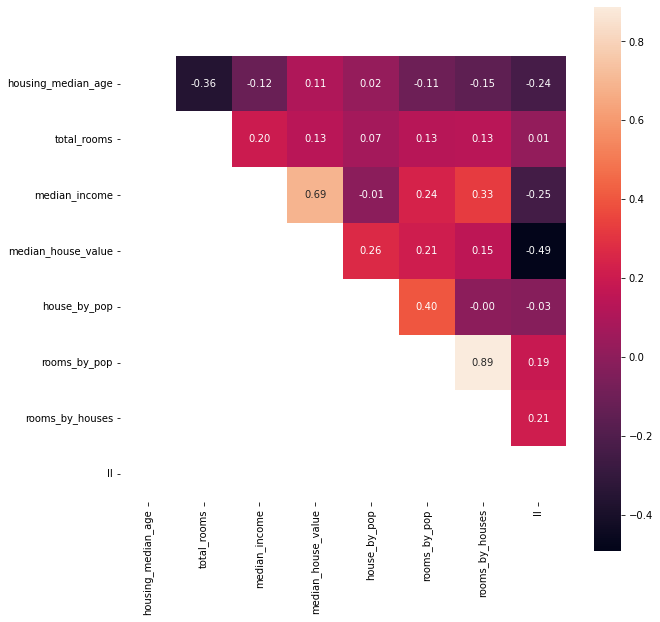

In [25]:
f = plt.figure(figsize=(10,10))
mask = np.tril(np.ones_like(df2.corr(), dtype=np.bool))
sns.heatmap(df2.corr(), annot=True, fmt=".2f", mask = mask, square = True)
plt.show;

The rooms by houses and rooms by pop are very correlated so I will drop the one with the least correlation to the target variable which is rooms_by_houses.

In [26]:
df2.corr()[(np.abs(df2.corr())>0.8)&(np.abs(df2.corr())<1)].isna() == False

,housing_median_age,total_rooms,median_income,median_house_value,house_by_pop,rooms_by_pop,rooms_by_houses,ll
housing_median_age,False,False,False,False,False,False,False,False
total_rooms,False,False,False,False,False,False,False,False
median_income,False,False,False,False,False,False,False,False
median_house_value,False,False,False,False,False,False,False,False
house_by_pop,False,False,False,False,False,False,False,False
rooms_by_pop,False,False,False,False,False,False,True,False
rooms_by_houses,False,False,False,False,False,True,False,False
ll,False,False,False,False,False,False,False,False


In [27]:
df2.drop(columns='rooms_by_houses', inplace=True)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
target = 'median_house_value'
y = df2[target]
X = df2.drop(columns=target)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Handle missing values

In [31]:
X.isna().sum()

housing_median_age    0
total_rooms           0
median_income         0
ocean_proximity       0
house_by_pop          0
rooms_by_pop          0
ll                    0
dtype: int64

The only missing values I got came from 'total_bedrooms' and I removed this column so no need to deal with missing values anymore

### Handle textual attributes

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   median_income       20640 non-null  float64
 3   ocean_proximity     20640 non-null  object 
 4   house_by_pop        20640 non-null  float64
 5   rooms_by_pop        20640 non-null  float64
 6   ll                  20640 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.1+ MB


Only 'ocean_proximity' textual

In [33]:
X_train['ocean_proximity'].unique()

array(['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [34]:
X_train['ocean_proximity'].value_counts()

<1H OCEAN     7312
INLAND        5227
NEAR OCEAN    2146
NEAR BAY      1824
ISLAND           3
Name: ocean_proximity, dtype: int64

In [35]:
X_train = pd.concat([X_train,pd.get_dummies(X_train['ocean_proximity'], drop_first=True)],axis='columns')
X_train.drop(columns='ocean_proximity', inplace=True)
X_train.head()

,housing_median_age,total_rooms,median_income,house_by_pop,rooms_by_pop,ll,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12069,6.0,502.0,4.2386,0.285088,2.201754,-83.72,1,0,0,0
15925,52.0,2381.0,4.3898,0.301010,1.603367,-84.71,0,0,1,0
11162,26.0,1718.0,3.9333,0.360078,1.681018,-84.17,0,0,0,0
4904,38.0,697.0,1.4653,0.275033,0.930574,-84.25,0,0,0,0
4683,52.0,2373.0,3.1765,0.507489,2.090749,-84.28,0,0,0,0


In [36]:
# Doing the same for X_test
X_test = pd.concat([X_test,pd.get_dummies(X_test['ocean_proximity'], drop_first=True)],axis='columns')
X_test.drop(columns='ocean_proximity', inplace=True)

In [37]:
# checking they still have the same columns
cols_to_add = set(X_train.columns) - set(X_test.columns)
cols_to_del = set(X_test.columns) - set(X_train.columns)
print(cols_to_add, cols_to_del)

set() set()


In [38]:
X_train.describe()

,housing_median_age,total_rooms,median_income,house_by_pop,rooms_by_pop,ll,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,28.619065,2640.140322,3.876298,0.364231,1.976775,-83.938226,0.316558,0.000182,0.110465,0.129966
std,12.600999,2186.893548,1.906783,0.093056,1.126541,0.812922,0.465147,0.013478,0.313478,0.336276
min,1.000000,2.000000,0.499900,0.001667,0.008576,-85.890000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,1448.000000,2.566625,0.304577,1.524560,-84.420000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,2127.000000,3.548500,0.354870,1.939673,-84.180000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,3149.000000,4.747575,0.411859,2.296220,-83.550000,1.000000,0.000000,0.000000,0.000000
max,52.000000,32627.000000,15.000100,1.333333,55.222222,-78.290000,1.000000,1.000000,1.000000,1.000000


In [39]:
# I also want to drop 'ISLAND' since its very unbalanced

In [40]:
np.abs(2*X_train.std() + X_train.quantile(q=0.75))

housing_median_age      62.201997
total_rooms           7522.787096
median_income            8.561142
house_by_pop             0.597970
rooms_by_pop             4.549302
ll                      81.924157
INLAND                   1.930295
ISLAND                   0.026957
NEAR BAY                 0.626956
NEAR OCEAN               0.672553
dtype: float64

In [41]:
X_train.drop(columns = 'ISLAND', inplace=True)
X_test.drop(columns = 'ISLAND', inplace=True)

### Outliers

I check from the description if I see some weird min and max

- max total_rooms is 32627 while 75% of data is under 3149
- max rooms_by_pop is 55 while 75% of data is under 2

In [42]:
from scipy.stats import norm

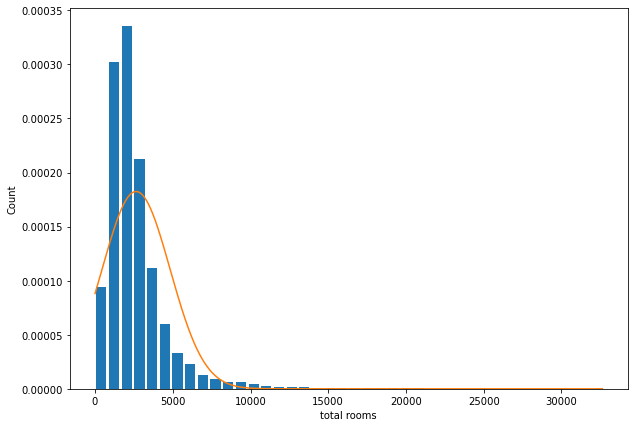

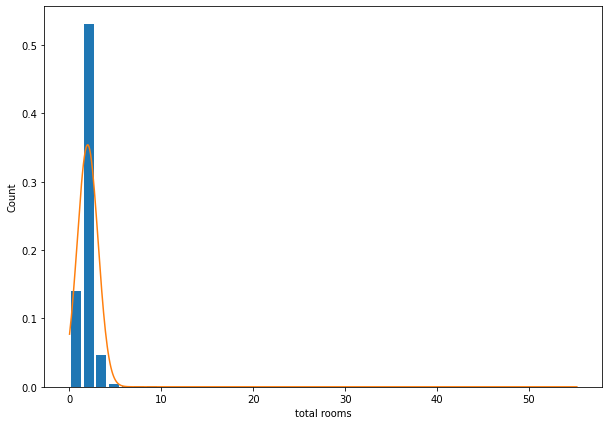

In [43]:
distributions = ['total_rooms', 'rooms_by_pop']

for d in distributions:
    plt.figure(figsize=(10,7))
    plt.hist(X_train[d], bins=40, rwidth=0.8, density=True)
    plt.xlabel('total rooms')
    plt.ylabel('Count')

    rng = np.arange(X_train[d].min(), X_train[d].max(), 0.1)
    plt.plot(rng, norm.pdf(rng,X_train[d].mean(),X_train[d].std()))
    plt.show()

We can see those 2 features are really right tailed and we don't have so much instances for some values

In [44]:
X_train.shape

(16512, 9)

In [45]:
max_threshold = {}
for d in distributions:
    max_threshold[d] = X_train[d].quantile(0.99)
    print(d,max_threshold[d])

total_rooms 11332.919999999984
rooms_by_pop 4.327187490898496


Let's analyse it

In [46]:
X_train[X_train['total_rooms'] > max_threshold['total_rooms']].describe()

,housing_median_age,total_rooms,median_income,house_by_pop,rooms_by_pop,ll,INLAND,NEAR BAY,NEAR OCEAN
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,9.704819,16020.686747,4.982852,0.364395,2.437013,-83.725120,0.506024,0.072289,0.108434
std,6.309462,4543.074291,1.622826,0.072627,0.997445,0.711264,0.501476,0.259750,0.311868
min,2.000000,11336.000000,1.757900,0.133653,0.704417,-85.890000,0.000000,0.000000,0.000000
25%,5.000000,12729.500000,3.868975,0.312213,1.994626,-84.177500,0.000000,0.000000,0.000000
50%,8.000000,14923.000000,4.772800,0.349016,2.190179,-83.745000,1.000000,0.000000,0.000000
75%,14.000000,17564.500000,6.078450,0.402054,2.569729,-83.290000,1.000000,0.000000,0.000000
max,32.000000,32627.000000,9.821000,0.646817,9.493846,-81.760000,1.000000,1.000000,1.000000


In [47]:
X_train.describe()

,housing_median_age,total_rooms,median_income,house_by_pop,rooms_by_pop,ll,INLAND,NEAR BAY,NEAR OCEAN
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,28.619065,2640.140322,3.876298,0.364231,1.976775,-83.938226,0.316558,0.110465,0.129966
std,12.600999,2186.893548,1.906783,0.093056,1.126541,0.812922,0.465147,0.313478,0.336276
min,1.000000,2.000000,0.499900,0.001667,0.008576,-85.890000,0.000000,0.000000,0.000000
25%,18.000000,1448.000000,2.566625,0.304577,1.524560,-84.420000,0.000000,0.000000,0.000000
50%,29.000000,2127.000000,3.548500,0.354870,1.939673,-84.180000,0.000000,0.000000,0.000000
75%,37.000000,3149.000000,4.747575,0.411859,2.296220,-83.550000,1.000000,0.000000,0.000000
max,52.000000,32627.000000,15.000100,1.333333,55.222222,-78.290000,1.000000,1.000000,1.000000


We dont't see any other feature that cann be the cause of it

Let's plot it on a graph

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

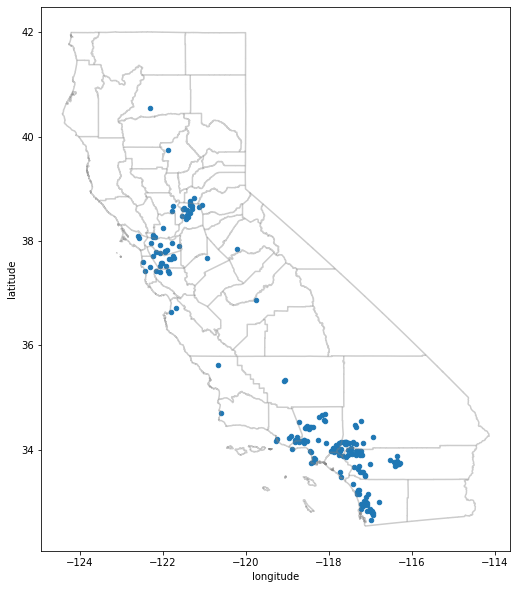

In [48]:
fig,ax = plt.subplots(figsize=(10,10))
street_map.plot(ax=ax, alpha = 0.4, color='grey')
(df[df['total_rooms'] > max_threshold['total_rooms']]).plot(ax=ax, kind='scatter', x='longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

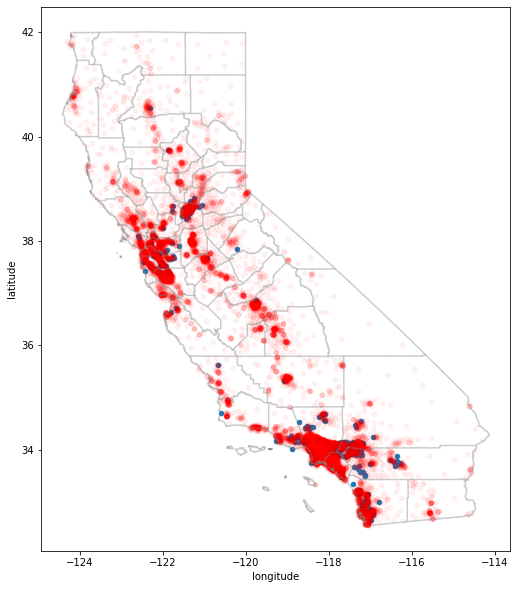

In [49]:
fig,ax = plt.subplots(figsize=(10,10))
street_map.plot(ax=ax, alpha = 0.4, color='grey')
(df[df['total_rooms'] > max_threshold['total_rooms']]).plot(ax=ax, kind='scatter', x='longitude', y='latitude')
(df[df['total_rooms'] <= max_threshold['total_rooms']]).plot(ax=ax, kind='scatter', 
                                                             x='longitude', y='latitude', c='r', alpha=0.05)

Even though they are in 2 specific areas, we can see thatwe also have the other data points there I will therefore drop those rows

It also seems obvious that we get those outliers for the other feature since they were created with the total_rooms number

In [50]:
X_train[(X_train['total_rooms']<max_threshold['total_rooms']) &
        (X_train['rooms_by_pop']<max_threshold['rooms_by_pop'])].shape

(16189, 9)

In [51]:
X_train.shape

(16512, 9)

In [52]:
y_train = y_train[(X_train['total_rooms']<max_threshold['total_rooms']) &
        (X_train['rooms_by_pop']<max_threshold['rooms_by_pop'])]
y_test = y_test[(X_test['total_rooms']<max_threshold['total_rooms']) &
        (X_test['rooms_by_pop']<max_threshold['rooms_by_pop'])]

In [53]:
X_train = X_train[(X_train['total_rooms']<max_threshold['total_rooms']) &
        (X_train['rooms_by_pop']<max_threshold['rooms_by_pop'])]

In [54]:
X_test = X_test[(X_test['total_rooms']<max_threshold['total_rooms']) &
        (X_test['rooms_by_pop']<max_threshold['rooms_by_pop'])]